## Exploring data - zadanie 2

#### Przypisanie poprawnych wtykier

In [ ]:
def change_number_to_sign(fileName):
  GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-') 
  data = np.genfromtxt(fileName, delimiter='\t') 
  X = data[:,:-1] 
  y = np.array(data[:,-1].astype(int))
  labels = np.array([GLOSKI[nr % 100] + str(nr // 100) for nr in y]) # ['a1', 'e1', 'i1', .., 'r1', 'a2', 'e2', ..]

  return X, y, labels

#### Zadanie

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# data = np.genfromtxt("136737-clustersel.txt", delimiter='\t') 
X, y, labels = change_number_to_sign("136737-clustersel.txt")

print(X.shape, y.shape)

(48, 63) (48,)


## Zadanie 3 - transformacja przestrzeni atrybutów

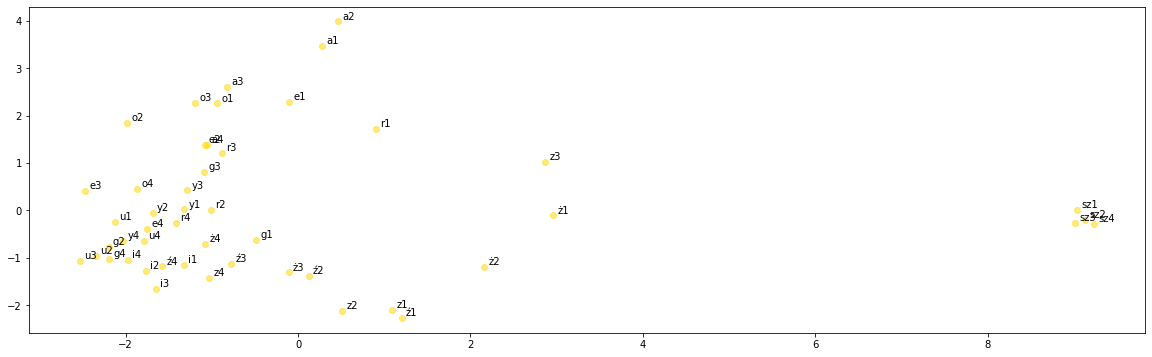

zachowana wariancja (%): 99.99999999999999
[20.99935109 10.03661842]


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

fig = plt.figure(1, figsize=(20, 6))
plt.clf()

X_reduced = pca.fit_transform(X)

for i, label in enumerate(labels):
  plt.annotate(label, X_pca[i] + 0.05)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap="inferno", facecolor="gold", alpha=0.5)
plt.show()

print('zachowana wariancja (%):', sum(pca.explained_variance_ratio_) * 100)
print(pca.singular_values_)

## Zadanie 5 - KMeans vs hipoteza z PCA

kmeans: (12, 2)


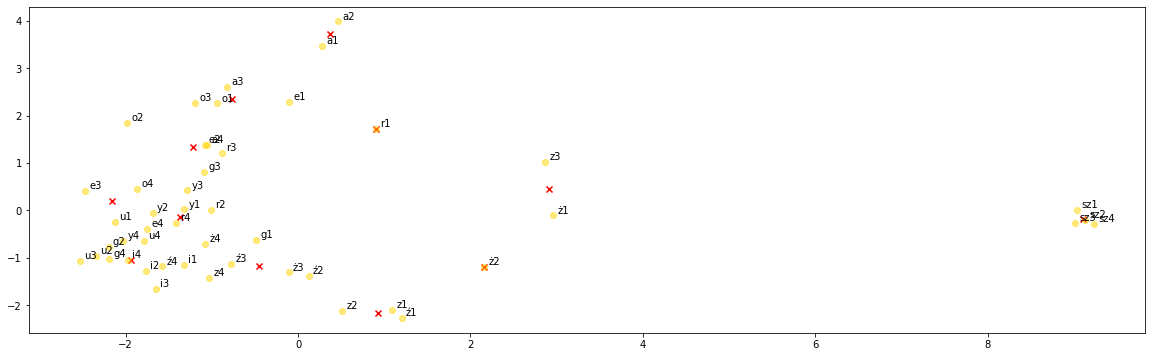

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(init='k-means++', n_clusters=12, n_init=10) 
k_means.fit(X) 
centroids = pca.transform(k_means.cluster_centers_)

clustercenters_trans = pca.transform(centroids) 
print('kmeans:', clustercenters_trans.shape) # kontrola, ze centroidy trafily do zredukowanej przez PCA przestrzeni 

fig = plt.figure(1, figsize=(20, 6))
plt.clf()

for i, label in enumerate(labels):
  plt.annotate(label, X_pca[i] + 0.05)

plt.scatter(clustercenters_trans[:,0], clustercenters_trans[:,1], marker='x', color='red')
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap="inferno", facecolor="gold", alpha=0.5)
plt.show()

## Zadanie 6 - AgglomerativeClustering

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

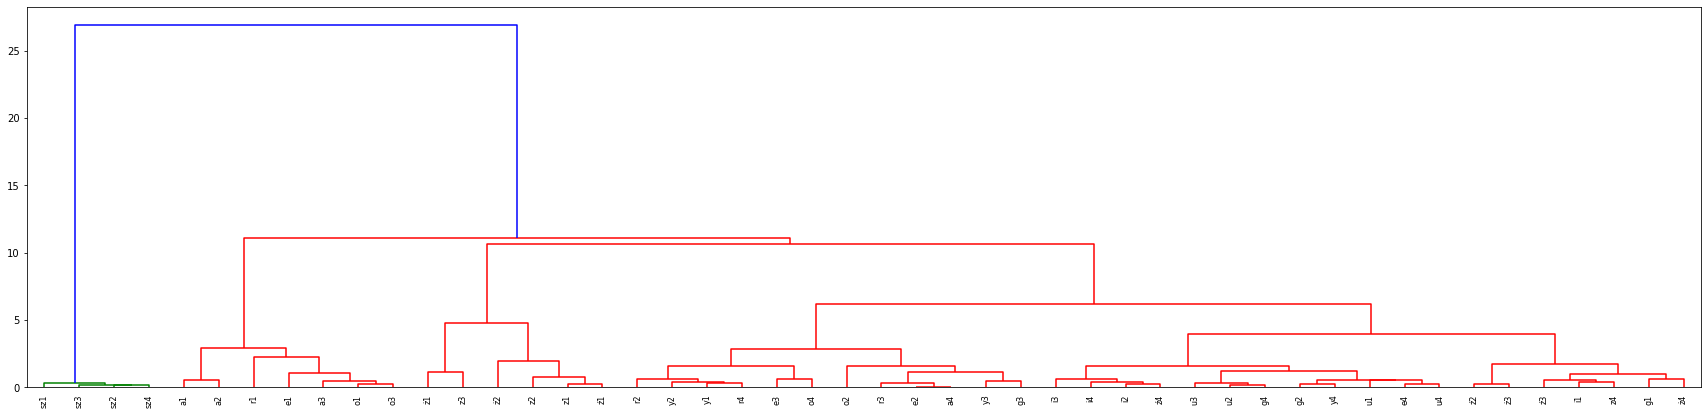

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

plt.figure(1, figsize=(30, 7))
plot_dendrogram(model, labels=labels)

## Zadanie 8 - sprawdzanie mowy polskiej bez podziału na głoski

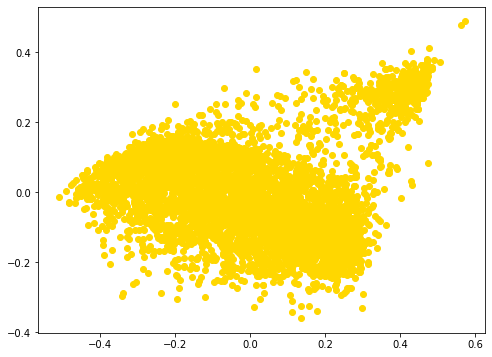

zachowana wariancja (%): 73.82112552516318
[15.33717141  9.48806173]


In [ ]:
data = np.genfromtxt("136737-cluster-contspeech.txt", delimiter='\t') 
X = data[:,:]

pca = PCA(n_components=2)

fig = plt.figure(1, figsize=(8, 6))
plt.clf()

X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap="inferno", facecolor="gold")
plt.show()

print('zachowana wariancja (%):', sum(pca.explained_variance_ratio_) * 100)
print(pca.singular_values_)

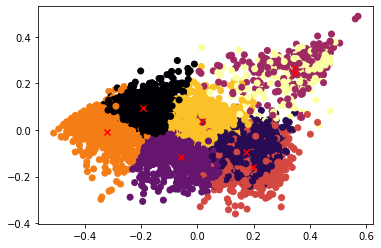

In [ ]:
kmeans = KMeans()
kmeans.fit(X)

centroids = pca.transform(kmeans.cluster_centers_)

plt.scatter(*X_reduced.T, c=kmeans.predict(X), cmap='inferno')
plt.scatter(*centroids.T, marker='x', color='red')

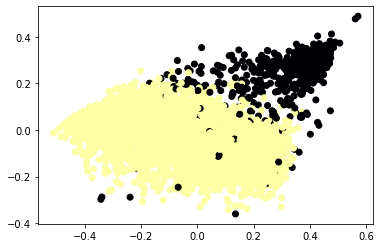

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.2, min_samples=200).fit(X)
plt.scatter(*X_reduced.T, c=clustering.labels_, cmap='inferno')

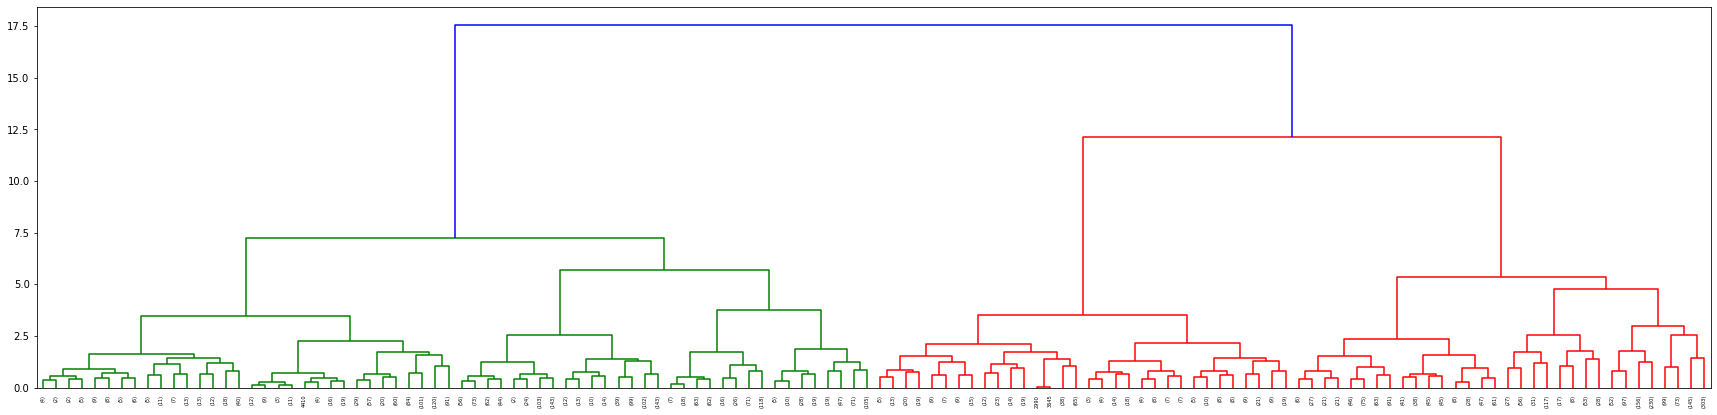

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

plt.figure(1, figsize=(30, 7))
plot_dendrogram(model, truncate_mode='level', p=6)

## Zadanie 9 - pomieszanie mowy i skrzypiec

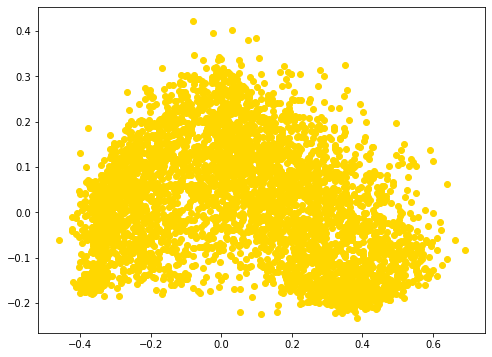

zachowana wariancja (%): 68.17349845423225
[20.02890808  9.29080297]


In [ ]:
data = np.genfromtxt("136737-cluster-contspeechviolin.txt", delimiter='\t') 
X = data[:,:]

pca = PCA(n_components=2)

fig = plt.figure(1, figsize=(8, 6))
plt.clf()

X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap="inferno", facecolor="gold")
plt.show()

print('zachowana wariancja (%):', sum(pca.explained_variance_ratio_) * 100)
print(pca.singular_values_)

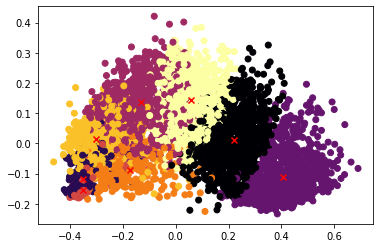

In [ ]:
kmeans = KMeans()
kmeans.fit(X)

centroids = pca.transform(kmeans.cluster_centers_)

plt.scatter(*X_reduced.T, c=kmeans.predict(X), cmap='inferno')
plt.scatter(*centroids.T, marker='x', color='red')

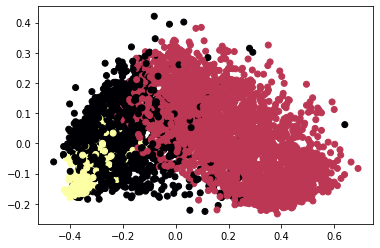

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.2, min_samples=200).fit(X)
plt.scatter(*X_reduced.T, c=clustering.labels_, cmap='inferno')

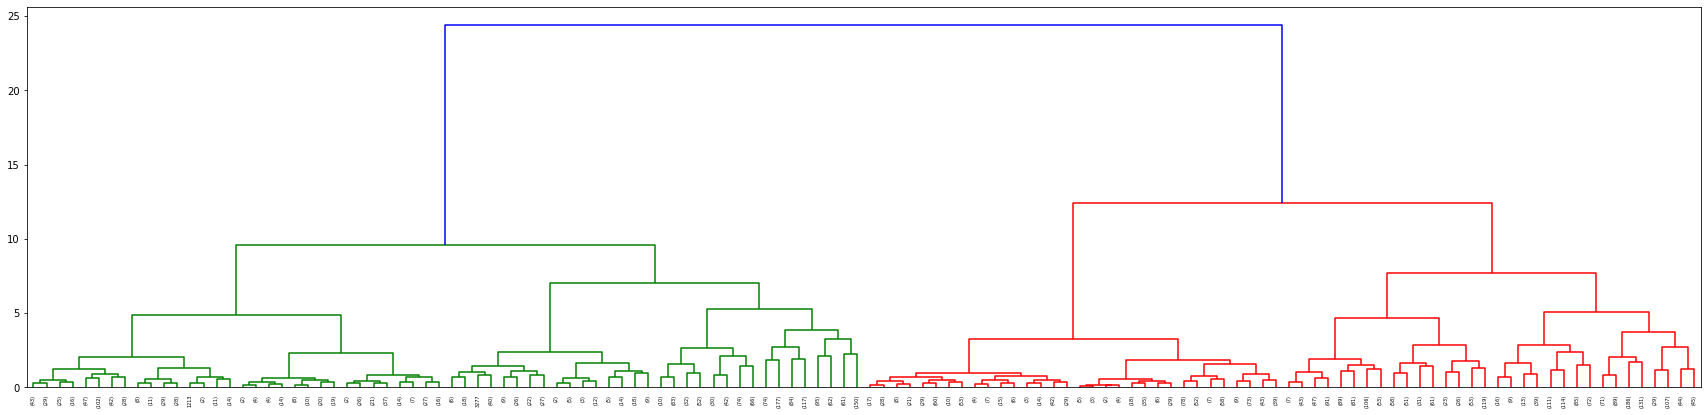

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

plt.figure(1, figsize=(30, 7))
plot_dendrogram(model, truncate_mode='level', p=6)